# Exploratory Data Analysis 
First I will explore the dataset to gain an insight which will help to define the next steps

In [1]:
import pandas as pd

df = pd.read_csv("data/raw.csv", sep=" ") # The file use space to separate columns
df.head(5)

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [2]:
print(list(df.columns))

['A11', '6', 'A34', 'A43', '1169', 'A65', 'A75', '4', 'A93', 'A101', '4.1', 'A121', '67', 'A143', 'A152', '2', 'A173', '1', 'A192', 'A201', '1.1']


The columns names are not defined in the csv file, so we change them in the file reading function

In [3]:
columns_names = ["Status", "Duration", "History", "Purpose", "Amount", "Savings", "Employment", "Installment_Rate", 
                 "Personal_Status", "Other_Debtors", "Residence_Years", "Property", "Age", "Other_Installments", "Housing",
                 "Existing_Credits", "Job", "Num_People_Liable", "Telephone", "Foreign_Worker", "Target"]

df = pd.read_csv("data/raw.csv", sep=" ", header=None, names=columns_names)
print(list(df.columns))
df.head(5)

['Status', 'Duration', 'History', 'Purpose', 'Amount', 'Savings', 'Employment', 'Installment_Rate', 'Personal_Status', 'Other_Debtors', 'Residence_Years', 'Property', 'Age', 'Other_Installments', 'Housing', 'Existing_Credits', 'Job', 'Num_People_Liable', 'Telephone', 'Foreign_Worker', 'Target']


,Status,Duration,History,Purpose,Amount,Savings,Employment,Installment_Rate,Personal_Status,Other_Debtors,...,Property,Age,Other_Installments,Housing,Existing_Credits,Job,Num_People_Liable,Telephone,Foreign_Worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
print(df.isnull().sum())

Status                0
Duration              0
History               0
Purpose               0
Amount                0
Savings               0
Employment            0
Installment_Rate      0
Personal_Status       0
Other_Debtors         0
Residence_Years       0
Property              0
Age                   0
Other_Installments    0
Housing               0
Existing_Credits      0
Job                   0
Num_People_Liable     0
Telephone             0
Foreign_Worker        0
Target                0
dtype: int64


In the next column I will change the target values from {1,2} to {0,1}. 

- 1 -> 0 = Good
- 2 -> 1 = Bad

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.astype(int)
df_encoded['Target'] = df_encoded['Target'].replace({1: 0, 2: 1})
df_encoded.head(5)

,Duration,Amount,Installment_Rate,Residence_Years,Age,Existing_Credits,Num_People_Liable,Target,Status_A12,Status_A13,...,Property_A124,Other_Installments_A142,Other_Installments_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,1,0,1,0,1,0,1,0,0,0


In [7]:
print(list(df_encoded.columns))

['Duration', 'Amount', 'Installment_Rate', 'Residence_Years', 'Age', 'Existing_Credits', 'Num_People_Liable', 'Target', 'Status_A12', 'Status_A13', 'Status_A14', 'History_A31', 'History_A32', 'History_A33', 'History_A34', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Savings_A62', 'Savings_A63', 'Savings_A64', 'Savings_A65', 'Employment_A72', 'Employment_A73', 'Employment_A74', 'Employment_A75', 'Personal_Status_A92', 'Personal_Status_A93', 'Personal_Status_A94', 'Other_Debtors_A102', 'Other_Debtors_A103', 'Property_A122', 'Property_A123', 'Property_A124', 'Other_Installments_A142', 'Other_Installments_A143', 'Housing_A152', 'Housing_A153', 'Job_A172', 'Job_A173', 'Job_A174', 'Telephone_A192', 'Foreign_Worker_A202']


In [8]:
target_column = "Target"
columns = [col for col in df_encoded.columns if col != target_column] # Get all columns names except Target one
columns.append(target_column)

df_encoded = df_encoded[columns]
print(list(df_encoded.columns))

df_encoded.head(5)

['Duration', 'Amount', 'Installment_Rate', 'Residence_Years', 'Age', 'Existing_Credits', 'Num_People_Liable', 'Status_A12', 'Status_A13', 'Status_A14', 'History_A31', 'History_A32', 'History_A33', 'History_A34', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43', 'Purpose_A44', 'Purpose_A45', 'Purpose_A46', 'Purpose_A48', 'Purpose_A49', 'Savings_A62', 'Savings_A63', 'Savings_A64', 'Savings_A65', 'Employment_A72', 'Employment_A73', 'Employment_A74', 'Employment_A75', 'Personal_Status_A92', 'Personal_Status_A93', 'Personal_Status_A94', 'Other_Debtors_A102', 'Other_Debtors_A103', 'Property_A122', 'Property_A123', 'Property_A124', 'Other_Installments_A142', 'Other_Installments_A143', 'Housing_A152', 'Housing_A153', 'Job_A172', 'Job_A173', 'Job_A174', 'Telephone_A192', 'Foreign_Worker_A202', 'Target']


,Duration,Amount,Installment_Rate,Residence_Years,Age,Existing_Credits,Num_People_Liable,Status_A12,Status_A13,Status_A14,...,Other_Installments_A142,Other_Installments_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_Worker_A202,Target
0,6,1169,4,4,67,2,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,0,1,...,0,1,1,0,1,0,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,1,0,1,0,1,0,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,0,1,0,1,0,1,0,0,0,1


Now, because it is a pretty clean dataset, we are ready with the pre-processing of the data and can move on to the training. But first, I would like to display some plots that are going to make the data more understandable.

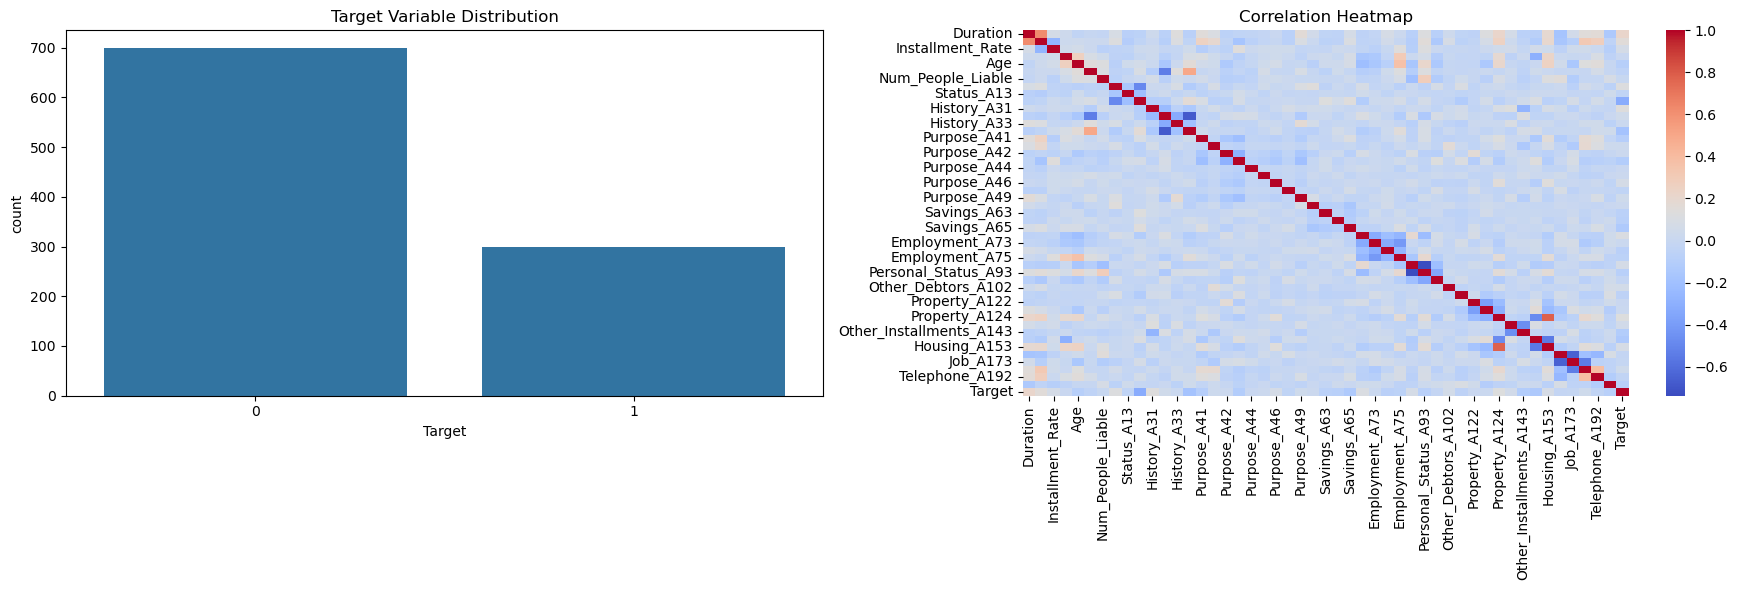

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize =(18, 6))

# First subplot
sns.countplot(x="Target", data=df_encoded, ax=axes[0])
axes[0].set_title("Target Variable Distribution")

# Second subplot
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()

**From the plots above we can infer two main things** 
- The first one is that the data set is a bit **unbalanced** towards good clients. But we have the solution to this already, which is the **cost matrix** that comes asociated to the dataset, changing the weights in the decision. It will be used later in the training
- A second observation is from the correlation matrix. This tells us that the correlation between variables is almost 0 for every one, but because we are first using decision trees this is not noticeable, although we could check this with the permutation importance of each feature

In [10]:
df_encoded.to_csv("data/pre_processed.csv", index=False)